In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
# plt.style.use('fivethirtyeight')

In [93]:
df = pd.read_csv('M890831.csv')

In [94]:
df = df.dropna()

In [95]:
df = df.transpose()

In [96]:
df.columns = ['Date', 'Generation']

In [97]:
df = df.iloc[1:]

In [98]:
df

,Date,Generation
Unnamed: 1,2022 Aug,4921.3
Unnamed: 2,2022 Jul,4952.4
Unnamed: 3,2022 Jun,4738.8
Unnamed: 4,2022 May,4968.7
Unnamed: 5,2022 Apr,4716.2
...,...,...
Unnamed: 568,1975 May,351.4
Unnamed: 569,1975 Apr,348.6
Unnamed: 570,1975 Mar,342.8
Unnamed: 571,1975 Feb,289.6


In [99]:
df = df[~df['Date'].str.endswith('13')]

In [100]:
df

,Date,Generation
Unnamed: 1,2022 Aug,4921.3
Unnamed: 2,2022 Jul,4952.4
Unnamed: 3,2022 Jun,4738.8
Unnamed: 4,2022 May,4968.7
Unnamed: 5,2022 Apr,4716.2
...,...,...
Unnamed: 568,1975 May,351.4
Unnamed: 569,1975 Apr,348.6
Unnamed: 570,1975 Mar,342.8
Unnamed: 571,1975 Feb,289.6


In [101]:
df['Date'] = pd.to_datetime(df['Date'])

In [102]:
df['Generation'] = pd.to_numeric(df['Generation'])

In [103]:
df.dtypes

Date          datetime64[ns]
Generation           float64
dtype: object

In [104]:
df = df.set_index('Date')

In [105]:
df

,Generation
Date,
2022-08-01,4921.3
2022-07-01,4952.4
2022-06-01,4738.8
2022-05-01,4968.7
2022-04-01,4716.2
...,...
1975-05-01,351.4
1975-04-01,348.6
1975-03-01,342.8


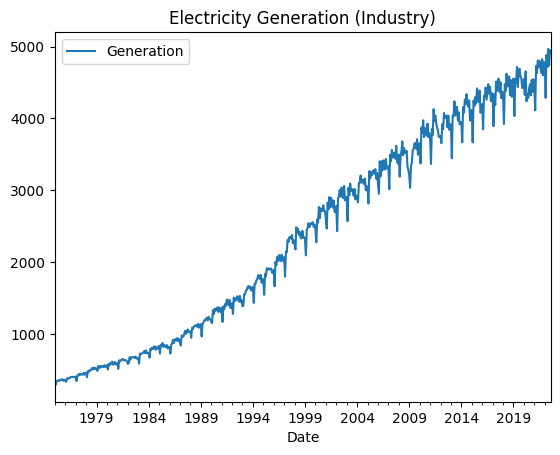

In [106]:
df.plot()
plt.title('Electricity Generation (Industry)')
plt.show()

## Stationarity


#### Three criteria:
 - Zero Trend, it isn't growing or shrinking
 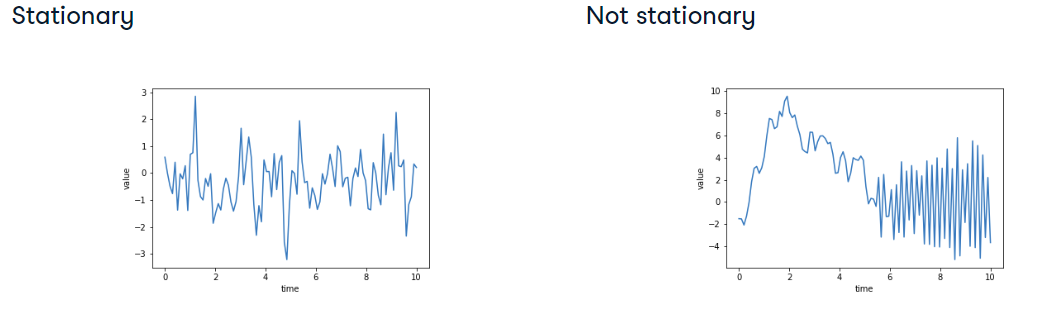
 - Variance is constant, the avg distance of data points from the zero line isn't changing
 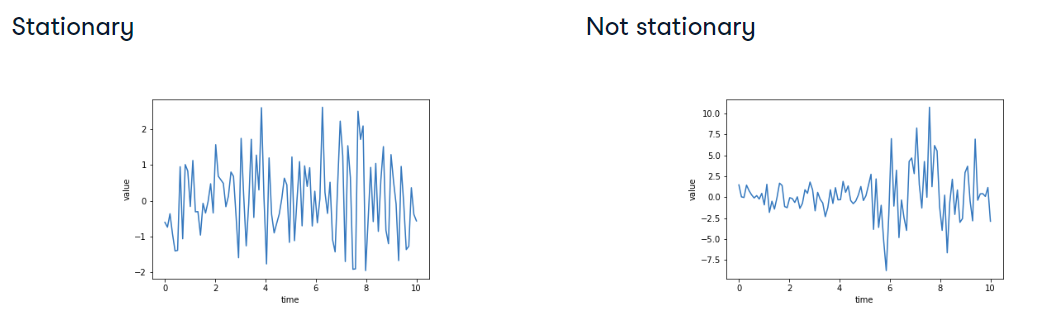
 - Autocorrelation is constant, how each value in times series is related to it's neighbors stays the same
 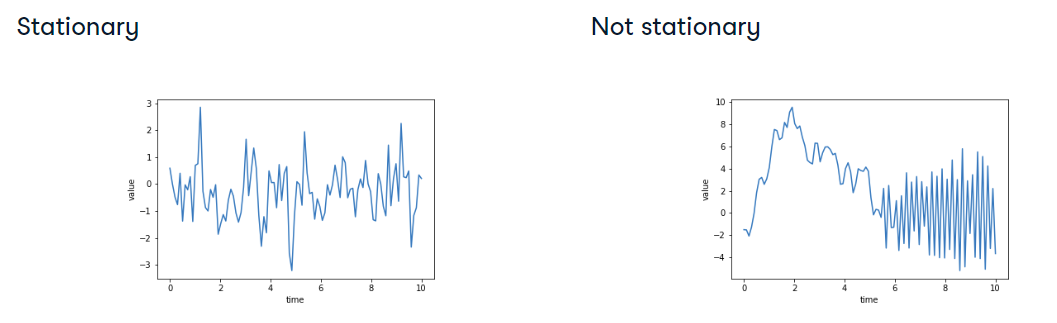

## Making time series stationary
#### Augmented Dicky-Fuller Test
 - A statistical test, where null hypothesis is that your time series is non-stationary due to trend.

In [34]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
results = adfuller(df['Generation'])

### Test results
#### 0th element: Test statistic
- More negative means more likely to be stationary

#### 1st element: p-value
- if p-value is small(0.05) -> reject null hypothesis. Reject non-stationary (assume that our time series must be stationary)

#### 4th element: Critical test statistics
 - test statistic value for p-value to be 0.05

In [ ]:
print('p-value: ',results[1])
print('test statstic:', results[0])

Since our p-value is not small(0.05), we cannot reject the null hypothesis so our data is non-stationary

### Non-stationary -> stationary
how? By taking the difference
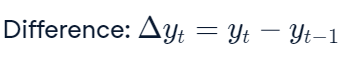

In [ ]:
df_stationary = df.diff().dropna()

In [ ]:
fig, ax = plt.subplots()
df_stationary.plot(ax=ax)
plt.title('Electricity Generation difference (Industry)')
plt.ylabel('𐤃 Generation')
plt.show()

In [ ]:
results = adfuller(df_stationary['Generation'])

In [ ]:
results

In [ ]:
df_nplog = df.apply(np.log)

In [ ]:
df_nplog

In [ ]:
fig, ax = plt.subplots()
df_nplog.plot(ax=ax)
plt.title('Electricity Generation difference (Industry)')
plt.ylabel('𐤃 Generation')
plt.show()

In [ ]:
results = adfuller(df_nplog['Generation'])

In [ ]:
results

In [36]:
df['Generation_log_diff'] = np.log(df['Generation']).dropna()

C:\Users\Laddi\anaconda3\envs\vertex\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 67843 (\N{PHOENICIAN LETTER DELT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


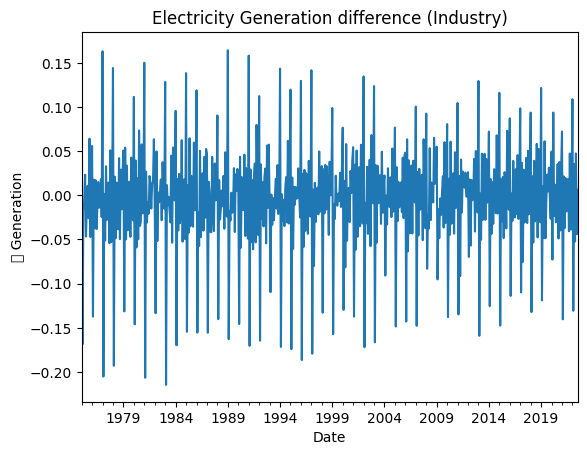

In [33]:
fig, ax = plt.subplots()
np.log(df['Generation']).diff().dropna().plot(ax=ax)
plt.title('Electricity Generation difference (Industry)')
plt.ylabel('𐤃 Generation')
plt.show()

In [34]:
results = adfuller(np.log(df['Generation']).diff().dropna())

NameError: name 'adfuller' is not defined

In [35]:
results

In [83]:
print('p-value: ',results[1],'\nTest statistics: ',results[0])

p-value:  8.928415320124701e-05 
Test statistics:  -4.686298410958571


# Autoregressive (AR) Models:
#### AR(1) Model:
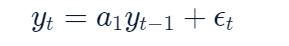
- eplison-t = white noise
- a1 is the autoregressive coefficient at lag one

#### AR(p) model:
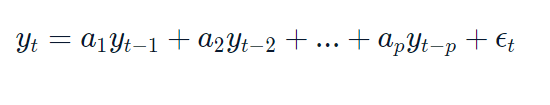


# Moving average (MA) Models:
#### MA(1) Model:
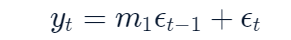
- m1 is the moving average coefficient

# ARMA models:
#### ARMA = AR + MA
- ARMA(p,q)
- p is order of AR part
- q is order of MA part
- ARMA(1,1) Model: 
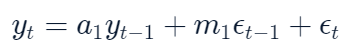

In [37]:
from statsmodels.tsa.arima.model import ARIMA


In [148]:
model = ARIMA(df['Generation_log_diff'] ,order=(1,1,0))

C:\Users\Laddi\anaconda3\envs\vertex\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
C:\Users\Laddi\anaconda3\envs\vertex\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Laddi\anaconda3\envs\vertex\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
C:\Users\Laddi\anaconda3\envs\vertex\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Laddi\anaconda3\envs\vertex\lib\site-packages\statsmodels\tsa\base\

In [149]:
results = model.fit()


In [150]:
forecast = results.get_prediction(start='2022-07-01',end='2020-08-01')

In [151]:
mean_forecast = np.exp(forecast.predicted_mean)
confidence_int = np.exp(forecast.conf_int())
lower_limits = confidence_int.loc[:,'lower Generation_log_diff']
upper_limits = confidence_int.loc[:,'upper Generation_log_diff']

In [152]:
df = df.merge(mean_forecast,how='left',left_index=True,right_index=True)

In [153]:
df_sub = df.dropna()
df_sub

,Generation,Generation_log_diff,predictions,predicted_mean
Date,,,,
2022-07-01,4952.4,8.507628,4921.300000,4921.299912
2022-06-01,4738.8,8.463539,4952.400000,4934.858620
2022-05-01,4968.7,8.510914,4738.800000,4857.952291
2022-04-01,4716.2,8.458759,4968.700000,4837.869048
2022-03-01,4886.1,8.494150,4716.200000,4856.800847
2022-02-01,4287.3,8.363412,4886.100000,4789.663664
2022-01-01,4780.2,8.472238,4287.300000,4614.925918
2021-12-01,4783.9,8.473011,4780.200000,4495.989813
2021-11-01,4602.2,8.434290,4783.900000,4781.815598


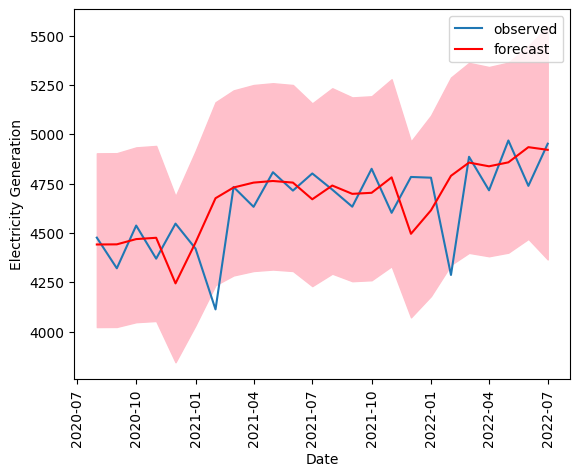

In [154]:
# plot the amazon data
plt.plot(df_sub.index, df_sub['Generation'], label='observed')

# plot your mean predictions
plt.plot(df_sub.index, df_sub['predicted_mean'], color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
		 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Electricity Generation')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

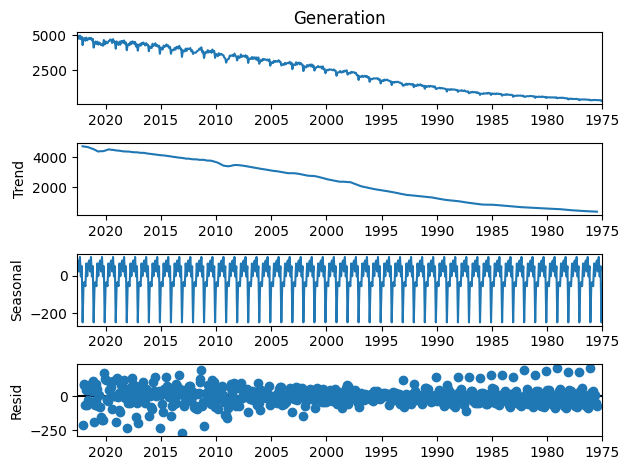

In [98]:
decomp = seasonal_decompose(df['Generation'],period=12)
decomp.plot()
plt.show()

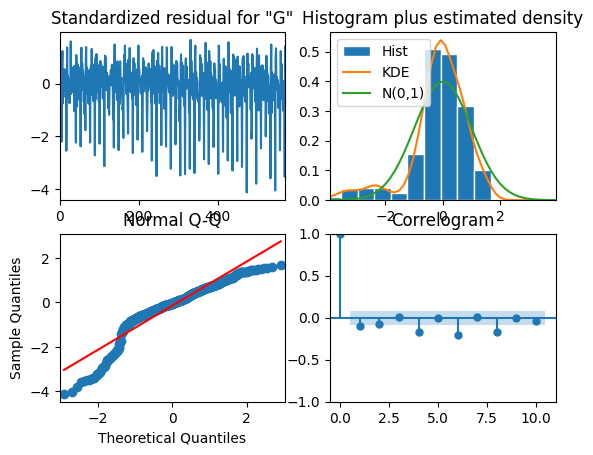

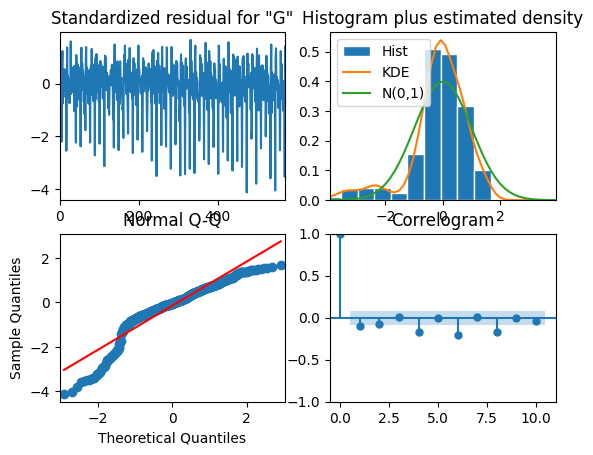

In [95]:
results.plot_diagnostics()

# ACF and PACF

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [40]:
generation_diff = df['Generation'].diff().diff(12).dropna()

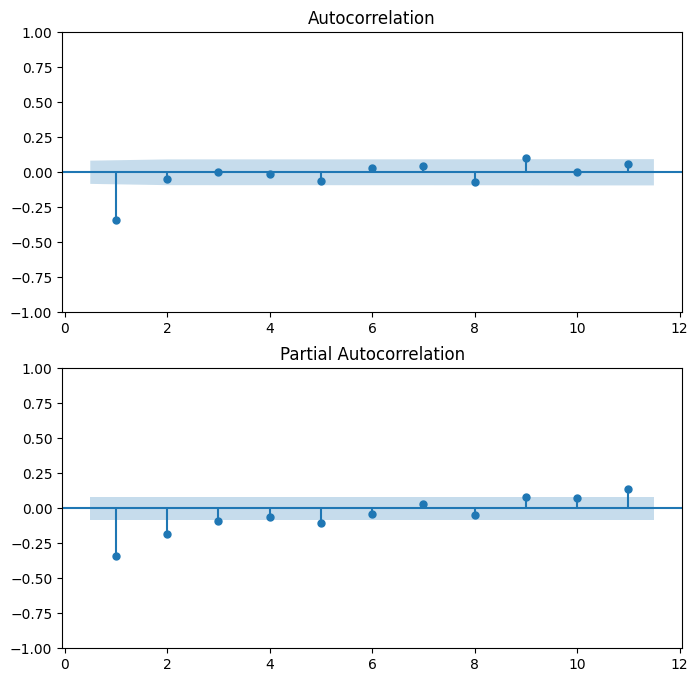

In [110]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,8))
plot_acf(generation_diff,lags=11,zero=False,ax=ax1)
plot_pacf(generation_diff,lags=11,zero=False,ax=ax2)
plt.show()

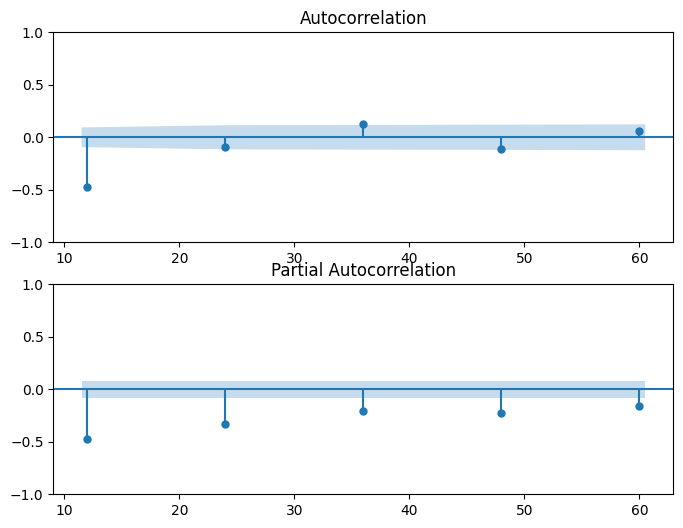

In [111]:
lags = [12, 24, 36, 48, 60]
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(generation_diff,lags=lags,zero=False,ax=ax1)

# Plot the PACF on ax2
plot_pacf(generation_diff,lags=lags,zero=False,ax=ax2)

plt.show()

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [109]:
model = SARIMAX(df['Generation'],order=(1,1,2),seasonal_order=(1,2,2,12))

In [110]:
results = model.fit()

In [111]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Generation   No. Observations:                  572
Model:             SARIMAX(1, 1, 2)x(1, 2, 2, 12)   Log Likelihood               -3005.478
Date:                            Tue, 27 Dec 2022   AIC                           6024.955
Time:                                    16:11:35   BIC                           6055.086
Sample:                                01-01-1975   HQIC                          6036.733
                                     - 08-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8047      0.076     10.635      0.000       0.656       0.953
ma.L1         -1.2463      0.082    -15.230      0.000      -1.407      -1.086
ma.L2          0.2968      0.055      5.353      0.000       0.188       0.406
ar.S.L12      -0.0888      0.051     -1.730      0.084      -0.189       0.012
ma.S.L12      -1.7924      0.038    -47.281      0.000      -1.867      -1.718
ma.S.L24       0.8116      0.040     20.423      0.000       0.734       0.890
sigma2      2921.1872    105.396     27.716      0.000    2714.615    3127.759
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               991.86
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              13.89   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [3]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [21]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        print("hi")
        try:
            mod = SARIMAX(df['Generation'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(e)
            continue
            


hi
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:10679.5286401488
hi
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9698.001756057198
hi
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:8906.972050345456
hi
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:7077.10589586888
hi
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6874.535690018123
hi
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:6610.9726096259765
hi
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:7094.6130849845795
hi
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:6389.733485145911
hi
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:6052.14962096142
hi
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6777.55827459697
hi
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6759.496423854374
hi
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:6581.272675821485
hi
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:6864.00837431605
hi
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6605.151314619289
hi
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:6275.535892577078
hi
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:6626.931976969428
hi
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:6331.523788348944
hi
ARIMA(0, 0, 0)

ARIMA(0, 1, 2)x(0, 2, 1, 12)12 - AIC:6089.094798626395
hi
ARIMA(0, 1, 2)x(0, 2, 2, 12)12 - AIC:5593.280789260859
hi
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:6348.722693602615
hi
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:6033.9899983166315
hi
ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:5900.6804581886245
hi
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:6111.876181150956
hi
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:5938.9340715024155
hi
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:5710.680961582727
hi
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:6390.389326828995
hi
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:5980.0902517355735
hi
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:5593.23622475537
hi
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:6076.350694061857
hi
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:5937.581748243241
hi
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:5879.695218975729
hi
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:5772.1233045824265
hi
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:5750.428039760468
hi
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:5717.873015072958
hi
ARIMA(0, 1

ARIMA(1, 0, 1)x(1, 1, 2, 12)12 - AIC:5738.208376152155
hi
ARIMA(1, 0, 1)x(1, 2, 0, 12)12 - AIC:6356.846861746121
hi
ARIMA(1, 0, 1)x(1, 2, 1, 12)12 - AIC:5981.857443590341
hi
ARIMA(1, 0, 1)x(1, 2, 2, 12)12 - AIC:5606.4730186685365
hi
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:6075.752692135973
hi
ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:5937.281636414076
hi
ARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:5906.165003813878
hi
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:5785.424345397891
hi
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:5748.4398905081725
hi
ARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:5750.062344711457
hi
ARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:5932.407650162971
hi
ARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:5679.12371773176
hi
ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:5606.252942400506
hi
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:7095.561437060434
hi
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:6665.323198197393
hi
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:6350.634174290048
hi
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:6380.068296063992
hi
ARIMA(1, 0, 2

KeyboardInterrupt: 

In [153]:
pred = results.get_prediction(start='2020-07-01',end='2022-07-01',dynamic=True)
sarima_mean = pred.predicted_mean
sarima_df = sarima_mean.to_frame(name='predictions')

In [154]:
pred.conf_int()

,lower Generation,upper Generation
2020-07-01,4376.382397,4588.256929
2020-08-01,4384.816186,4627.490198
2020-09-01,4226.971152,4491.757139
2020-10-01,4367.022655,4648.659575
2020-11-01,4129.681925,4424.726767
2020-12-01,4214.849666,4520.937273
2021-01-01,4261.131388,4576.580147
2021-02-01,3844.366334,4167.949044
2021-03-01,4369.906918,4700.708576
2021-04-01,4252.523789,4589.849759


In [155]:
lower_limits = pred.conf_int().loc[:,'lower Generation']
upper_limits = pred.conf_int().loc[:,'upper Generation']

In [156]:
sarima_df

,predictions
2020-07-01,4482.319663
2020-08-01,4506.153192
2020-09-01,4359.364145
2020-10-01,4507.841115
2020-11-01,4277.204346
2020-12-01,4367.893469
2021-01-01,4418.855767
2021-02-01,4006.157689
2021-03-01,4535.307747
2021-04-01,4421.186774


In [171]:
test_df= df.merge(sarima_df['predictions'],how='left',left_index=True,right_index=True)

In [170]:
df = df.drop(['predictions_x','predictions_y','predictions'],axis=1)

In [175]:
test_df = test_df.dropna()

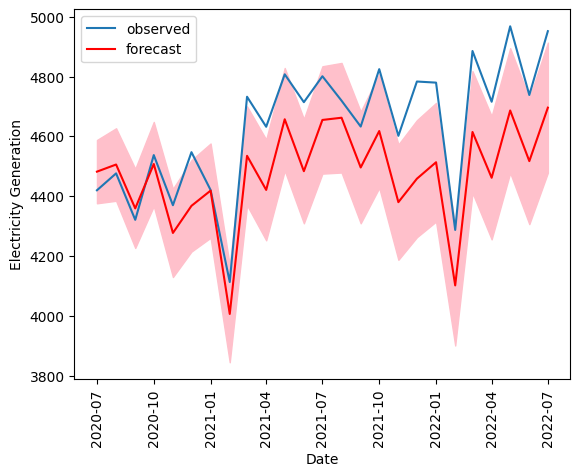

In [176]:
# plot the amazon data
plt.plot(test_df.index, test_df['Generation'], label='observed')

# plot your mean predictions
plt.plot(test_df.index, test_df['predictions'], color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits,
		 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Electricity Generation')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [134]:
forecast = results.get_forecast(steps=100,dynamic=True)

In [135]:
forecast.predicted_mean

2022-09-01    4753.025013
2022-10-01    4894.539630
2022-11-01    4661.720482
2022-12-01    4770.776287
2023-01-01    4784.061458
                 ...     
2030-08-01    5453.913386
2030-09-01    5252.967025
2030-10-01    5431.061920
2030-11-01    5175.360423
2030-12-01    5345.953342
Freq: MS, Name: predicted_mean, Length: 100, dtype: float64

In [136]:
data=pd.concat([df,forecast.predicted_mean])

In [137]:
df.sort_index(inplace=True)

In [140]:
data[data.index > '2022-07-01']

,Generation,predictions,0
2022-08-01,4921.3,NaN,NaN
2022-09-01,NaN,NaN,4753.025013
2022-10-01,NaN,NaN,4894.539630
2022-11-01,NaN,NaN,4661.720482
2022-12-01,NaN,NaN,4770.776287
...,...,...,...
2030-08-01,NaN,NaN,5453.913386
2030-09-01,NaN,NaN,5252.967025
2030-10-01,NaN,NaN,5431.061920
2030-11-01,NaN,NaN,5175.360423


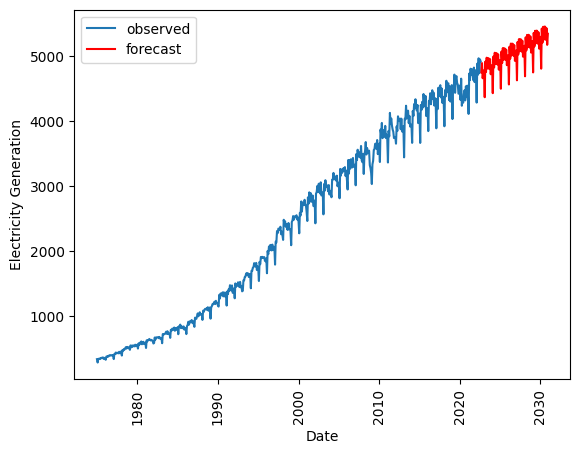

In [139]:
# plot the amazon data
plt.plot(data.index, data['Generation'], label='observed')

# plot your mean predictions
plt.plot(data.index, data[0], color='r', label='forecast')

# shade the area between your confidence limits

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Electricity Generation')
plt.xticks(rotation=90)
plt.legend()
plt.show()

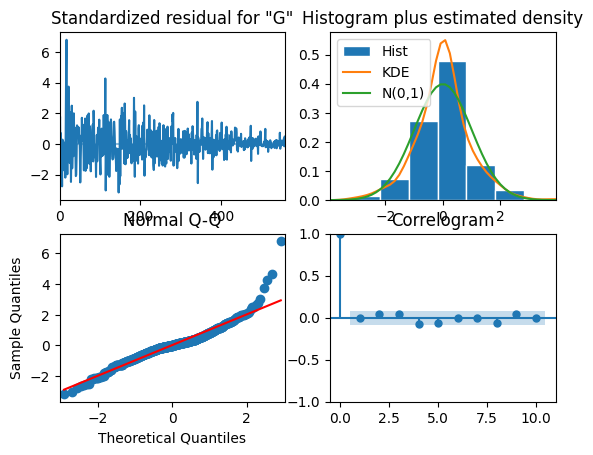

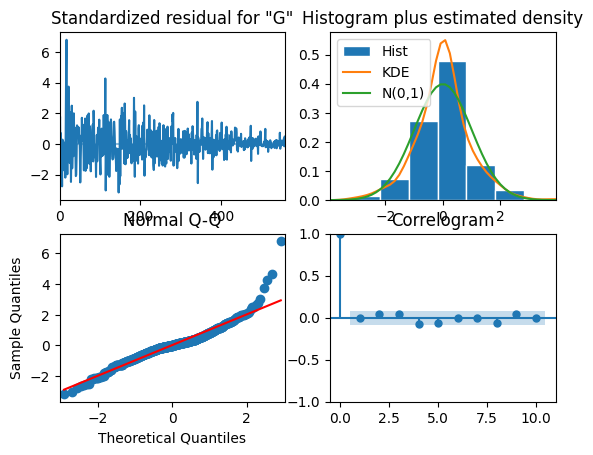

In [85]:
results.plot_diagnostics()

### Time series forecasting with XGBoost

In [ ]:
train = df.loc[df.index < '2018-01-01']
test = df.loc[df.index >= '2018-01-01']

fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax,label='Train')
test.plot(ax=ax,label='Test')
ax.axvline('2018-01-01', color='black',ls='--')
ax.legend(['Training set','Test set'])
plt.show()

In [ ]:
def create_features(df):
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df

In [ ]:
df = create_features(df)

In [ ]:
df.dtypes

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df,x='quarter',y='Generation',palette='Blues')
ax.set_title('Generation by Quarter')
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df,x='month',y='Generation',palette='Blues')
ax.set_title('Generation by Month')
plt.show() 

In [ ]:
train = create_features(train)

In [ ]:
test = create_features(test)

In [ ]:
FEATURES = ['month','quarter','year']
TARGET = 'Generation'

In [ ]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

## Create Model

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=10,learning_rate=0.01)
reg.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],
      verbose=True)

In [ ]:
importance = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
            columns=['Importance'])

In [ ]:
importance

In [ ]:
importance.sort_values('Importance').plot(kind='barh',title='Feature Importance')

# Forecast on Test

In [ ]:
test['prediction']=reg.predict(X_test)

In [ ]:
df = df.merge(test['prediction'],how='left',left_index=True,right_index=True)

In [ ]:
df.columns

In [ ]:
ax= df[['Generation']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax)
plt.legend(['Truth Data','Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [ ]:
np.sqrt(mean_squared_error(test['Generation'],test['prediction']))